# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [34]:
# OpenWeatherMap API Key
api_key = '500dd5138008dcc01a22fe59f1d5a2cb'

# State the URL for Weather MAP API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key 



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#Intiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []

#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
Start of Records
------------------------------
City number 1 of 593 complete. | Added atuona
City number 2 of 593 complete. | Added bontang
City number 3 of 593 complete. | Added vaini
City number 4 of 593 complete. | Added albany
City number 5 of 593 complete. | Added kapaa
City number 6 of 593 complete. | Added tasiilaq
City number 7 of 593 complete. | Added saint george
City number 8 of 593 complete. | Added rikitea
City number 9 of 593 complete. | Added guerrero negro
City number 10 of 593 complete. | Added tahoua
City number 11 of 593 complete. | Added mataura
City number 12 of 593 complete. | Added puerto ayora
City number 13 of 593 complete. | Added hermanus
City number 14 of 593 complete. | Added san patricio
City number 15 of 593 complete. | Added grand gaube
City number 16 of 593 complete. | Added mahon
City number 17 of 593 complete. | Added butaritari
Missing data in city number 18 of 593. | Skipping tsihombe
City number 19 of 593 complete. |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Atuona,-9.80,-139.03,81.28,75,50,17.22
1,Bontang,0.13,117.50,83.08,75,0,7.78
2,Vaini,-21.20,-175.20,84.20,74,75,17.22
3,Albany,42.60,-73.97,24.17,79,90,13.87
4,Kapaa,22.08,-159.32,73.80,64,75,21.92


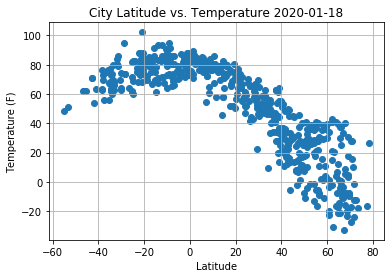

In [37]:
#Plot latitude vs temperature and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

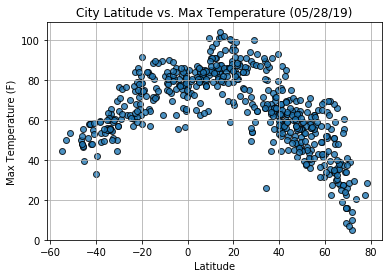

#### Latitude vs. Humidity Plot

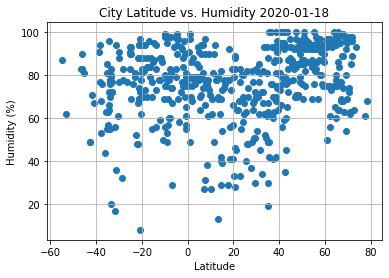

In [38]:
#Plot latitude vs humidity and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

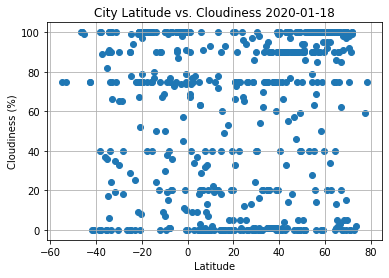

In [39]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

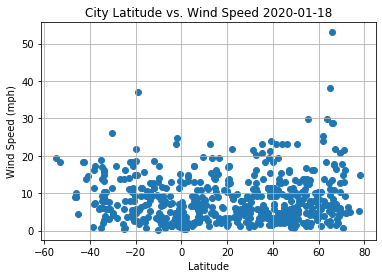

In [40]:
#Plot latitude vs wind speed and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')